In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from hydra import initialize, compose
from lenstronomy.Plots import plot_util
from glob import glob
import random
from astropy.visualization import make_lupton_rgb
from lenstronomy.Plots import plot_util
from copy import deepcopy

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import overplot
from mejiro.lenses.test import SampleSkyPyLens
from mejiro.helpers import pyhalo, color
from mejiro.plots import plot, plot_util
from mejiro.utils import util

In [2]:
index = 50

dir = os.path.join(pickle_dir, '03_models_and_updated_lenses')
files = glob(dir + f'/lens_dict_{str(index).zfill(8)}_*')

f106 = [util.unpickle(i) for i in files if 'f106' in i][0]
f129 = [util.unpickle(i) for i in files if 'f129' in i][0]
f158 = [util.unpickle(i) for i in files if 'f158' in i][0]
f184 = [util.unpickle(i) for i in files if 'f184' in i][0]

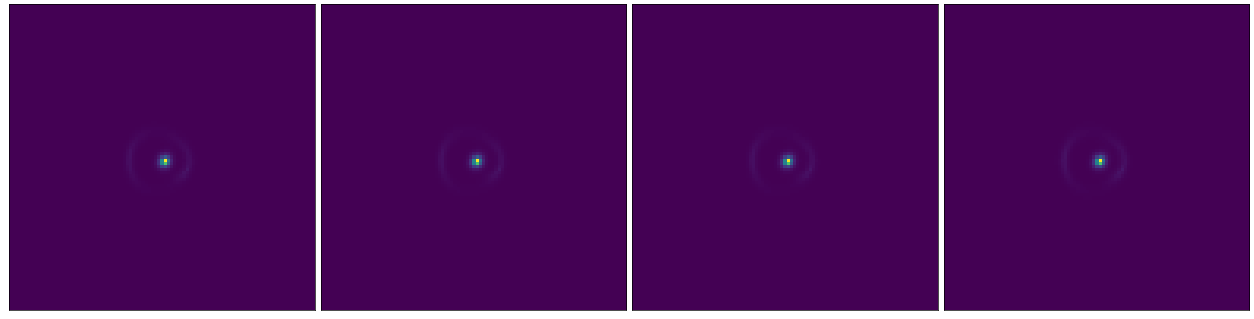

In [3]:
plot.plot_list([f106['model'], f129['model'], f158['model'], f184['model']])

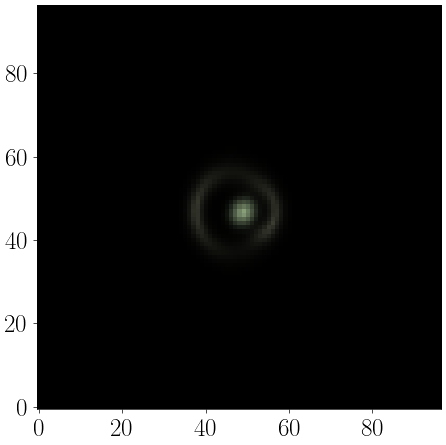

In [11]:
rgb_image = color.get_rgb(image_b=f106['model'], 
                          image_g=f129['model'], 
                          image_r=f184['model'], 
                          minimum=None,
                          stretch=10,
                          Q=10)

plot.plot(rgb_image)